# MACHINE LEARNING OLS

In [1]:
#Importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy import stats
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error


In [3]:
#Importing data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
csv_file_path = '../Modeldata/data_ready.csv'
df_final = pd.read_csv(csv_file_path)
df_final
df_final.set_index('Unnamed: 0', inplace=True)
df_final.index.name = None
print(len(df_final))

19848


In [5]:
##Deleting observations with less than 20 m2 -> To avoid "non-appartments"
outliers_m2 = df_final[(df_final['m2'] < 20) | ((df_final['m2'] < 50) & (df_final['Boligtype_Landejendom'] == 1))]
#print(outliers_m2)
df_final = df_final.drop(outliers_m2.index)

#Square meter price:
df_final['price/m2'] = df_final['Price']/df_final['m2']

print(len(df_final))
########################################################################
# Calculate Z-scores for each value in the column
df_final['z_score_price_m2'] = stats.zscore(df_final['price/m2'])

# Define outliers as any points with a Z-score > 4 or < -4
outliers = df_final[(df_final['z_score_price_m2'] > 4) | (df_final['z_score_price_m2'] < -4)]
#print(outliers.sort_values(by='price/m2', ascending=False))

df_final = df_final.drop(outliers.index)
df_final.drop(columns='price/m2', inplace=True)
########################################################################
# Calculate Z-scores for m2
df_final['z_score_m2'] = stats.zscore(df_final['m2'])

# Define outliers as any points with a Z-score > 4 or < -4
outliers_m2 = df_final[(df_final['z_score_m2'] > 4) | (df_final['z_score_m2'] < -4)]
#print(outliers_m2.sort_values(by='m2', ascending=True))
print(len(outliers_m2))
df_final = df_final.drop(outliers_m2.index)
print(len(df_final))

########################################################################
"""
#Calculate Z-scores for price
df_final['z_score_price'] = stats.zscore(df_final['Price'])
# Define outliers as any points with a Z-score > 4 or < -4
outliers_price = df_final[(df_final['z_score_price'] > 4) | (df_final['z_score_price'] < -4)]
#print(outliers_m2.sort_values(by='m2', ascending=True))
df_final = df_final.drop(outliers_price.index)

"""
print(len(df_final))

df_final = df_final.drop('z_score_m2', axis=1)
df_final = df_final.drop('z_score_price_m2', axis=1)

#print(df_final.sort_values(by='price/m2', ascending=True))

19845
97
19631
19631


In [7]:
y = df_final['Price']
X = df_final.drop(columns=['Price'])

In [9]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=42) #The random_state works as a seed

#2
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42)

In [21]:
# DEFINE PIPELINE
pipe_lr = make_pipeline(PolynomialFeatures(degree=1), 
                        StandardScaler(),
                        LinearRegression())

# FIT PIPELINE TO DEVELOPMENT DATA
pipe_lr.fit(X_dev, y_dev)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

LinReg_MSE 2726299168473.83
LinReg_MAE 1055081.14
LinReg_MAPE 2.02
LinReg_RMSE 1651150.861815429
LinReg_r2 0.6505357243948504


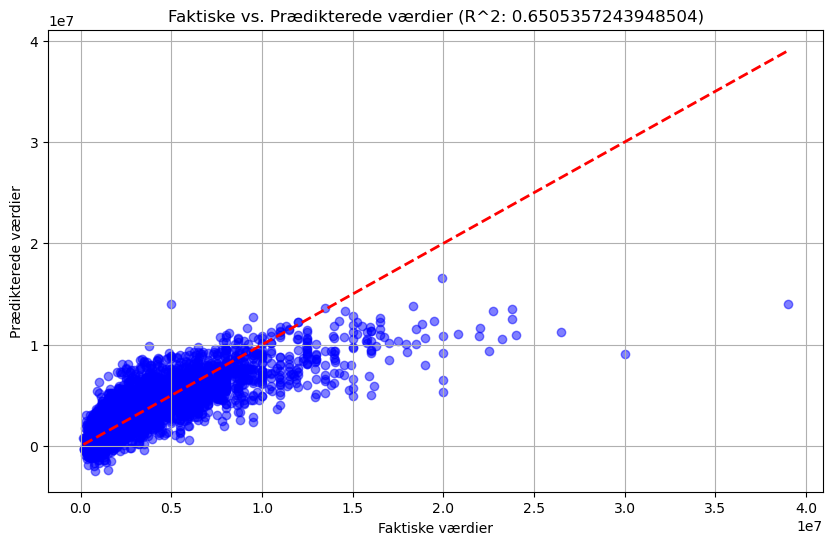

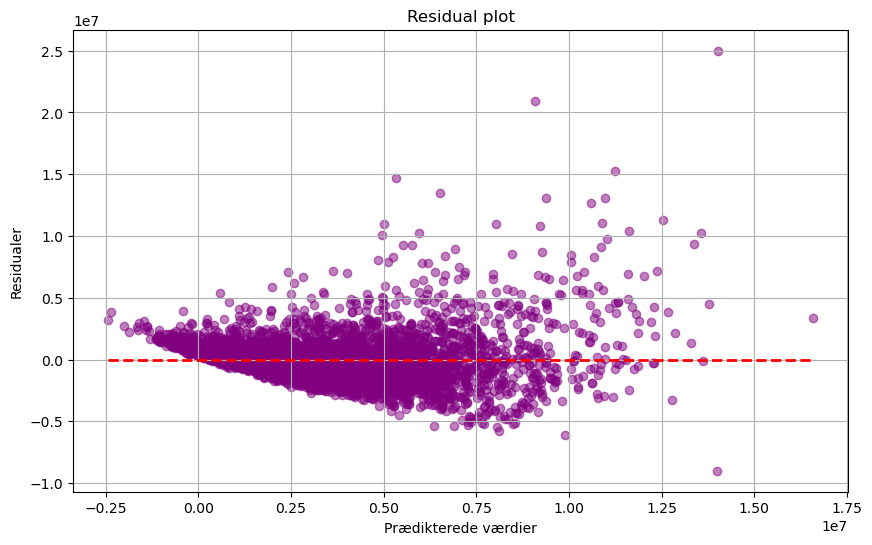

In [33]:
y_predict_lr_degree_1 = pipe_lr.predict(X_test)
print('LinReg_MSE', round(mse(y_predict_lr_degree_1,y_test), 2))
print('LinReg_MAE', round(mean_absolute_error(y_predict_lr_degree_1, y_test), 2))
print('LinReg_MAPE', round(mean_absolute_percentage_error(y_predict_lr_degree_1, y_test), 2))
print('LinReg_RMSE', np.sqrt(mse(y_predict_lr_degree_1, y_test)))
print('LinReg_r2', r2_score(y_test, y_predict_lr_degree_1))
linear_model = pipe_lr.named_steps['linearregression']
coeff = linear_model.coef_

# Plot af faktiske vs. prædikterede værdier
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_lr_degree_1, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Reference linje for perfekt prædiktion
plt.xlabel('Faktiske værdier')
plt.ylabel('Prædikterede værdier')
plt.title(f'Faktiske vs. Prædikterede værdier (R^2: {r2_score(y_test, y_predict_lr_degree_1)})')
plt.grid(True)
plt.show()

# Plot af residualer (fejl)
residuals = y_test - y_predict_lr_degree_1

plt.figure(figsize=(10, 6))
plt.scatter(y_predict_lr_degree_1, residuals, color='purple', alpha=0.5)
plt.hlines(0, y_predict_lr_degree_1.min(), y_predict_lr_degree_1.max(), color='red', lw=2, linestyle='--')
plt.xlabel('Prædikterede værdier')
plt.ylabel('Residualer')
plt.title('Residual plot')
plt.grid(True)
plt.show()


In [ ]:
print('Koefficienter:', coeff)

In [11]:
# Initializing Linear-regression-model with degree=2
from sklearn.linear_model import Lasso, LinearRegression

# DEFINE PIPELINE
pipe_lr = make_pipeline(PolynomialFeatures(degree=2), 
                        StandardScaler(),
                        LinearRegression())

# FIT PIPELINE TO DEVELOPMENT DATA
pipe_lr.fit(X_dev, y_dev)

"""
scaler = StandardScaler()
X_dev2 = scaler.fit_transform(X_dev)
X_test2 = scaler.transform(X_test)

ols_model_scaled = LinearRegression()

ols_model_scaled.fit(X_dev2, y_train)

y_pred_ols_scaled = ols_model_scaled.predict(X_test2)
y_pred_ols_train = ols_model_scaled.predict(X_dev2)

ols_mse_scaled = mse(y_test, y_pred_ols_scaled)
ols_r2_scaled = r2_score(y_test, y_pred_ols_scaled)
"""


'\nscaler = StandardScaler()\nX_dev2 = scaler.fit_transform(X_dev)\nX_test2 = scaler.transform(X_test)\n\nols_model_scaled = LinearRegression()\n\nols_model_scaled.fit(X_dev2, y_train)\n\ny_pred_ols_scaled = ols_model_scaled.predict(X_test2)\ny_pred_ols_train = ols_model_scaled.predict(X_dev2)\n\nols_mse_scaled = mse(y_test, y_pred_ols_scaled)\nols_r2_scaled = r2_score(y_test, y_pred_ols_scaled)\n'

In [13]:
y_predict = pipe_lr.predict(X_test)
print('LinReg_MSE', round(mse(y_predict,y_test), 2))
print('LinReg_MAE', round(mean_absolute_error(y_predict, y_test), 2))
print('LinReg_MAPE', round(mean_absolute_percentage_error(y_predict, y_test), 2))
print('LinReg_RMSE', np.sqrt(mse(y_predict, y_test)))
print('LinReg_r2', r2_score(y_test, y_predict))

"""
y_test_pred_linreg = pipe_lr.predict(X_test)
r2_score_linereg = r2_score(y_test, y_test_pred_linreg)
print(r2_score_linereg)
"""

LinReg_MSE 3.584234379100323e+37
LinReg_MAE 2.0142209353768627e+17
LinReg_MAPE 0.8
LinReg_RMSE 5.986847567042544e+18
LinReg_r2 -4.5943669182591717e+24


'\ny_test_pred_linreg = pipe_lr.predict(X_test)\nr2_score_linereg = r2_score(y_test, y_test_pred_linreg)\nprint(r2_score_linereg)\n'

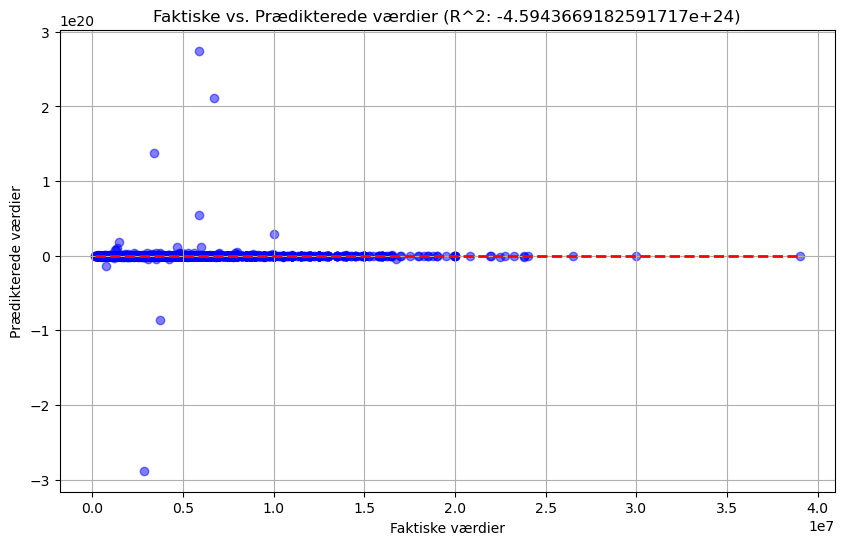

NameError: name 'y_pred_test' is not defined

<Figure size 1000x600 with 0 Axes>

In [19]:
# Plot af faktiske vs. prædikterede værdier
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Reference linje for perfekt prædiktion
plt.xlabel('Faktiske værdier')
plt.ylabel('Prædikterede værdier')
plt.title(f'Faktiske vs. Prædikterede værdier (R^2: {r2_score(y_test, y_predict)})')
plt.grid(True)
plt.show()

# Plot af residualer (fejl)
residuals = y_test - y_predict

plt.figure(figsize=(10, 6))
plt.scatter(y_predict, residuals, color='purple', alpha=0.5)
plt.hlines(0, y_predict.min(), y_predict.max(), color='red', lw=2, linestyle='--')
plt.xlabel('Prædikterede værdier')
plt.ylabel('Residualer')
plt.title('Residual plot')
plt.grid(True)
plt.show()



# Lasso-model, degree=1 and no Cross-validation

In [35]:
# Initialize Lasso-model with degree=1, CV=0
from sklearn.metrics import mean_squared_error as mse

# PREPARATION
perform = [] # Store performance
lambdas = np.logspace(0, 7, 66) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=1), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=42))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val)
    perform.append(mse(y_val,y_pred))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

Optimal lambda: 3579.696061042174
Validation MSE: 2543117154906.510


In [37]:
# INSERT OPTIMAL LAMBDA INTO NEW MODEL
pipe_lasso = make_pipeline(PolynomialFeatures(degree=1), 
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

# FIT NEW MODEL ON ALL OF THE DEVELOPMENT (non-test) DATA TO BUILD BEST POSSIBLE MODEL
pipe_lasso.fit(X_dev, y_dev) 

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=3579.696061042174))])

Lasso_MSE_de0 2730185206193.37
Lasso_MAE_de0 1052013.89
Lasso_MAPE_de0 2.95
Lasso_RMSE_de0 1652327.2091790321
Lasso_R2_de0 0.6500376017484677


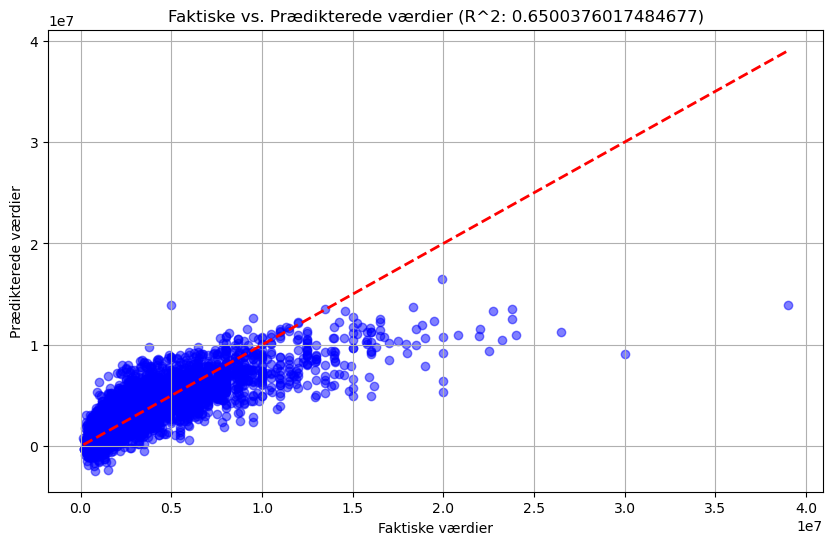

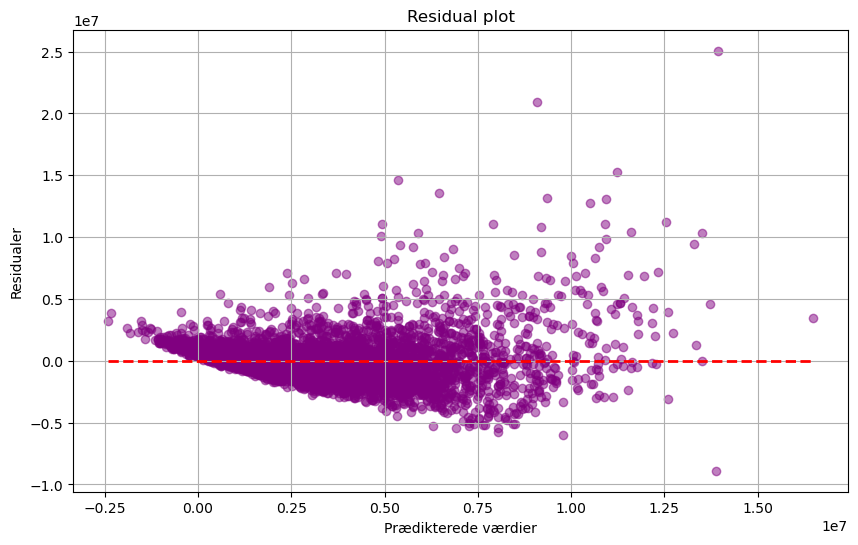

In [39]:
#Printing MSE, MAE, MAPE, RMSE
y_test_pred_lasso_degree_0 = pipe_lasso.predict(X_test)
print('Lasso_MSE_de1', round(mse(y_test_pred_lasso_degree_0,y_test), 2))
print('Lasso_MAE_de1', round(mean_absolute_error(y_test_pred_lasso_degree_0, y_test), 2))
print('Lasso_MAPE_de1', round(mean_absolute_percentage_error(y_test_pred_lasso_degree_0, y_test), 2))
print('Lasso_RMSE_de1', np.sqrt(mse(y_test_pred_lasso_degree_0, y_test)))
print('Lasso_R2_de1', r2_score(y_test, y_test_pred_lasso_degree_0))

# Plot af faktiske vs. prædikterede værdier
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso_degree_0, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Reference linje for perfekt prædiktion
plt.xlabel('Faktiske værdier')
plt.ylabel('Prædikterede værdier')
plt.title(f'Faktiske vs. Prædikterede værdier (R^2: {r2_score(y_test, y_test_pred_lasso_degree_0)})')
plt.grid(True)
plt.show()

# Plot af residualer (fejl)
residuals = y_test - y_test_pred_lasso_degree_0

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_lasso_degree_0, residuals, color='purple', alpha=0.5)
plt.hlines(0, y_test_pred_lasso_degree_0.min(), y_test_pred_lasso_degree_0.max(), color='red', lw=2, linestyle='--')
plt.xlabel('Prædikterede værdier')
plt.ylabel('Residualer')
plt.title('Residual plot')
plt.grid(True)
plt.show()


# LASSO-MODEL MED DEGREE=2 and no Cross-validation

In [ ]:
# Initialize Lasso-model with degree=1, CV=0
from sklearn.metrics import mean_squared_error as mse

# PREPARATION
perform = [] # Store performance
lambdas = np.logspace(0, 7, 66) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=2), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=42))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val)
    perform.append(mse(y_val,y_pred))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

In [ ]:
# INSERT OPTIMAL LAMBDA INTO NEW MODEL
pipe_lasso = make_pipeline(PolynomialFeatures(degree=2), 
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

# FIT NEW MODEL ON ALL OF THE DEVELOPMENT (non-test) DATA TO BUILD BEST POSSIBLE MODEL
pipe_lasso.fit(X_dev, y_dev) 

In [ ]:
#Printing MSE, MAE, MAPE, RMSE
y_test_pred_lasso_degree_0 = pipe_lasso.predict(X_test)
print('Lasso_MSE_de2', round(mse(y_test_pred_lasso_degree_0,y_test), 2))
print('Lasso_MAE_de2', round(mean_absolute_error(y_test_pred_lasso_degree_0, y_test), 2))
print('Lasso_MAPE_de2', round(mean_absolute_percentage_error(y_test_pred_lasso_degree_0, y_test), 2))
print('Lasso_RMSE_de2', np.sqrt(mse(y_test_pred_lasso_degree_0, y_test)))
print('Lasso_R2_de2', r2_score(y_test, y_test_pred_lasso_degree_0))

# Plot af faktiske vs. prædikterede værdier
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lasso_degree_0, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Reference linje for perfekt prædiktion
plt.xlabel('Faktiske værdier')
plt.ylabel('Prædikterede værdier')
plt.title(f'Faktiske vs. Prædikterede værdier (R^2: {r2_score(y_test, y_test_pred_lasso_degree_0)})')
plt.grid(True)
plt.show()

# Plot af residualer (fejl)
residuals = y_test - y_test_pred_lasso_degree_0

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_lasso_degree_0, residuals, color='purple', alpha=0.5)
plt.hlines(0, y_test_pred_lasso_degree_0.min(), y_test_pred_lasso_degree_0.max(), color='red', lw=2, linestyle='--')
plt.xlabel('Prædikterede værdier')
plt.ylabel('Residualer')
plt.title('Residual plot')
plt.grid(True)
plt.show()
